In [2]:
import pandas as pd
import numpy as np
import sklearn
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
%config IPCompleter.greedy=True

## Reading Pandas Dataframes of All Four Phases (Stance + Swing)

In [3]:
df_25 = pd.read_csv("Slope_Estimation_Task/window_450/x_train_25.csv")
df_50 = pd.read_csv("Slope_Estimation_Task/window_450/x_train_50.csv")
df_75 = pd.read_csv("Slope_Estimation_Task/window_450/x_train_75.csv")
df_100 = pd.read_csv("Slope_Estimation_Task/window_450/x_train_100.csv")

df_25_val = pd.read_csv("Slope_Estimation_Task/window_450/x_val_25.csv")
df_50_val = pd.read_csv("Slope_Estimation_Task/window_450/x_val_50.csv")
df_75_val = pd.read_csv("Slope_Estimation_Task/window_450/x_val_75.csv")
df_100_val = pd.read_csv("Slope_Estimation_Task/window_450/x_val_100.csv")

df_25_test = pd.read_csv("Slope_Estimation_Task/window_450/x_test_25.csv")
df_50_test = pd.read_csv("Slope_Estimation_Task/window_450/x_test_50.csv")
df_75_test = pd.read_csv("Slope_Estimation_Task/window_450/x_test_75.csv")
df_100_test = pd.read_csv("Slope_Estimation_Task/window_450/x_test_100.csv")

In [4]:
df_25.head()

,Fx_mean,Fx_min,Fx_max,Fx_std,Fx_last,Fy_mean,Fy_min,Fy_max,Fy_std,Fy_last,...,Thigh_gz_mean,Thigh_gz_min,Thigh_gz_max,Thigh_gz_std,Thigh_gz_last,Subject,Phase,Slope,window_num,window_speed
0,-47.811156,-92.729858,7.151000,40.773744,-92.729858,-35.957400,-86.649593,29.279305,39.133567,-49.128101,...,-0.280217,-0.717972,0.393770,0.251349,-0.077804,AB07,1,-10.0,1,0.14835
1,-28.253028,-90.224665,0.128636,37.979125,-87.515802,-27.988199,-110.128581,17.091794,42.999468,-56.558441,...,-0.447022,-1.516960,0.710189,0.555962,-0.990409,AB07,1,-10.0,2,0.40785
2,-18.689355,-90.224665,0.240361,32.670979,-84.044658,-19.307059,-110.128581,17.091794,39.525626,-100.720584,...,-0.370749,-1.516960,0.710189,0.562637,-0.089410,AB07,1,-10.0,2,0.40785
3,-8.916371,-85.399459,0.297729,21.636323,-85.399459,-7.482540,-100.168335,17.091794,24.286735,-100.168335,...,-0.277535,-1.516960,1.170524,0.589772,-1.515494,AB07,1,-10.0,2,0.40785
4,-2.015372,-35.100511,0.297729,4.862634,-35.100511,1.721816,-31.048105,44.945731,8.353031,-31.048105,...,-0.022276,-1.144343,1.830483,0.807817,-0.151513,AB07,1,-10.0,2,0.40785


In [5]:
print(df_25_test[df_25_test["window_num"]==2]["Slope"])
print(df_50_test[df_50_test["window_num"]==2]["Slope"])
print(df_75_test[df_75_test["window_num"]==2]["Slope"])
print(df_100_test[df_100_test["window_num"]==2]["Slope"])

1      -10.0
2      -10.0
3      -10.0
4      -10.0
5      -10.0
        ... 
4798     7.5
4799     7.5
4800     7.5
4801     7.5
4802     7.5
Name: Slope, Length: 68, dtype: float64
1      -10.0
2      -10.0
3      -10.0
4      -10.0
5      -10.0
        ... 
4793     7.5
4794     7.5
4795     7.5
4796     7.5
4797     7.5
Name: Slope, Length: 68, dtype: float64
1      -10.0
2      -10.0
3      -10.0
4      -10.0
5      -10.0
        ... 
4795     7.5
4796     7.5
4797     7.5
4798     7.5
4799     7.5
Name: Slope, Length: 68, dtype: float64
1      -10.0
2      -10.0
3      -10.0
4      -10.0
5      -10.0
        ... 
4796     7.5
4797     7.5
4798     7.5
4799     7.5
4800     7.5
Name: Slope, Length: 68, dtype: float64


## Drop Unneeded Columns

In [6]:
df_25 = df_25.drop(["Subject", "Phase", "window_num", "window_speed"], axis=1)
df_50 = df_50.drop(["Subject", "Phase",	"window_num", "window_speed"], axis=1)
df_75 = df_75.drop(["Subject", "Phase",	"window_num", "window_speed"], axis=1)
df_100 = df_100.drop(["Subject", "Phase", "window_num", "window_speed"], axis=1)

df_25_val = df_25_val.drop(["Subject", "Phase", "window_num", "window_speed"], axis=1)
df_50_val = df_50_val.drop(["Subject", "Phase",	"window_num", "window_speed"], axis=1)
df_75_val = df_75_val.drop(["Subject", "Phase",	"window_num", "window_speed"], axis=1)
df_100_val = df_100_val.drop(["Subject", "Phase", "window_num", "window_speed"], axis=1)

df_25_test = df_25_test.drop(["Subject", "Phase", "window_num", "window_speed"], axis=1)
df_50_test = df_50_test.drop(["Subject", "Phase",	"window_num", "window_speed"], axis=1)
df_75_test = df_75_test.drop(["Subject", "Phase",	"window_num", "window_speed"], axis=1)
df_100_test = df_100_test.drop(["Subject", "Phase", "window_num", "window_speed"], axis=1)

## Data Preprocessing

In [7]:
X_train_25 = df_25.iloc[:, :-1].values
y_train_25 = df_25.iloc[:, -1].values
X_train_50 = df_50.iloc[:, :-1].values
y_train_50 = df_50.iloc[:, -1].values
X_train_75 = df_75.iloc[:, :-1].values
y_train_75 = df_75.iloc[:, -1].values
X_train_100 = df_100.iloc[:, :-1].values
y_train_100 = df_100.iloc[:, -1].values

X_val_25 = df_25_val.iloc[:, :-1].values
y_val_25 = df_25_val.iloc[:, -1].values
X_val_50 = df_50_val.iloc[:, :-1].values
y_val_50 = df_50_val.iloc[:, -1].values
X_val_75 = df_75_val.iloc[:, :-1].values
y_val_75 = df_75_val.iloc[:, -1].values
X_val_100 = df_100_val.iloc[:, :-1].values
y_val_100 = df_100_val.iloc[:, -1].values

X_test_25 = df_25_test.iloc[:, :-1].values
y_test_25 = df_25_test.iloc[:, -1].values
X_test_50 = df_50_test.iloc[:, :-1].values
y_test_50 = df_50_test.iloc[:, -1].values
X_test_75 = df_75_test.iloc[:, :-1].values
y_test_75 = df_75_test.iloc[:, -1].values
X_test_100 = df_100_test.iloc[:, :-1].values
y_test_100 = df_100_test.iloc[:, -1].values


y_train_25 = np.expand_dims(y_train_25, axis=1)
y_train_50 = np.expand_dims(y_train_50, axis=1)
y_train_75 = np.expand_dims(y_train_75, axis=1)
y_train_100 = np.expand_dims(y_train_100, axis=1)

y_val_25 = np.expand_dims(y_val_25, axis=1)
y_val_50 = np.expand_dims(y_val_50, axis=1)
y_val_75 = np.expand_dims(y_val_75, axis=1)
y_val_100 = np.expand_dims(y_val_100, axis=1)

y_test_25 = np.expand_dims(y_test_25, axis=1)
y_test_50 = np.expand_dims(y_test_50, axis=1)
y_test_75 = np.expand_dims(y_test_75, axis=1)
y_test_100 = np.expand_dims(y_test_100, axis=1)

In [98]:
print("X_Training_25 Shape: ", X_train_25.shape)
print("X_Training_50 Shape: ", X_train_50.shape)
print("X_Training_75 Shape: ", X_train_75.shape)
print("X_Training_100 Shape: ", X_train_100.shape)
print("X_Val_25 Shape: ", X_val_25.shape)
print("X_Val_50 Shape: ", X_val_50.shape)
print("X_Val_75 Shape: ", X_val_75.shape)
print("X_Val_100 Shape: ", X_val_100.shape)
print("X_Test_25 Shape: ", X_test_25.shape)
print("X_Test_50 Shape: ", X_test_50.shape)
print("X_Test_75 Shape: ", X_test_75.shape)
print("X_Test_100 Shape: ", X_test_100.shape)


print("y_Training_25 Shape: ", y_train_25.shape)
print("y_Training_50 Shape: ", y_train_50.shape)
print("y_Training_75 Shape: ", y_train_75.shape)
print("y_Training_100 Shape: ", y_train_100.shape)
print("y_Val_25 Shape: ", y_val_25.shape)
print("y_Val_50 Shape: ", y_val_50.shape)
print("y_Val_75 Shape: ", y_val_75.shape)
print("y_Val_100 Shape: ", y_val_100.shape)
print("y_Test_25 Shape: ", y_test_25.shape)
print("y_Test_50 Shape: ", y_test_50.shape)
print("y_Test_75 Shape: ", y_test_75.shape)
print("y_Test_100 Shape: ", y_test_100.shape)

X_Training_25 Shape:  (34095, 170)
X_Training_50 Shape:  (34109, 170)
X_Training_75 Shape:  (34102, 170)
X_Training_100 Shape:  (34094, 170)
X_Val_25 Shape:  (8639, 170)
X_Val_50 Shape:  (8641, 170)
X_Val_75 Shape:  (8641, 170)
X_Val_100 Shape:  (8636, 170)
X_Test_25 Shape:  (5280, 170)
X_Test_50 Shape:  (5274, 170)
X_Test_75 Shape:  (5276, 170)
X_Test_100 Shape:  (5278, 170)
y_Training_25 Shape:  (34095, 1)
y_Training_50 Shape:  (34109, 1)
y_Training_75 Shape:  (34102, 1)
y_Training_100 Shape:  (34094, 1)
y_Val_25 Shape:  (8639, 1)
y_Val_50 Shape:  (8641, 1)
y_Val_75 Shape:  (8641, 1)
y_Val_100 Shape:  (8636, 1)
y_Test_25 Shape:  (5280, 1)
y_Test_50 Shape:  (5274, 1)
y_Test_75 Shape:  (5276, 1)
y_Test_100 Shape:  (5278, 1)


## Feature Scaling

In [8]:
ss = StandardScaler()

In [9]:
X_train_25 = ss.fit_transform(X_train_25)
X_train_50 = ss.fit_transform(X_train_50)
X_train_75 = ss.fit_transform(X_train_75)
X_train_100 = ss.fit_transform(X_train_100)

X_val_25 = ss.fit_transform(X_val_25)
X_val_50 = ss.fit_transform(X_val_50)
X_val_75 = ss.fit_transform(X_val_75)
X_val_100 = ss.fit_transform(X_val_100)

X_test_25 = ss.fit_transform(X_test_25)
X_test_50 = ss.fit_transform(X_test_50)
X_test_75 = ss.fit_transform(X_test_75)
X_test_100 = ss.fit_transform(X_test_100)


X_train_25 = ss.fit_transform(X_train_25)
X_train_50 = ss.fit_transform(X_train_50)
X_train_75 = ss.fit_transform(X_train_75)
X_train_100 = ss.fit_transform(X_train_100)



y_train_25 = ss.fit_transform(y_train_25)
y_train_50 = ss.fit_transform(y_train_50)
y_train_75 = ss.fit_transform(y_train_75)
y_train_100 = ss.fit_transform(y_train_100)

y_val_25 = ss.fit_transform(y_val_25)
y_val_50 = ss.fit_transform(y_val_50)
y_val_75 = ss.fit_transform(y_val_75)
y_val_100 = ss.fit_transform(y_val_100)

y_test_25 = ss.fit_transform(y_test_25)
y_test_50 = ss.fit_transform(y_test_50)
y_test_75 = ss.fit_transform(y_test_75)
y_test_100 = ss.fit_transform(y_test_100)


In [10]:
print(X_train_25)

[[-3.60865493 -1.5090789  -0.64417256 ... -0.99042081 -1.42008735
   0.44517217]
 [-2.08320371 -1.44036017 -0.90023197 ... -0.5653613  -0.24545996
  -0.60054271]
 [-1.33727766 -1.44036017 -0.89615809 ... -0.5653613  -0.21972309
   0.43187325]
 ...
 [ 0.31030219  0.84496615  0.61062566 ... -0.38155176  0.43207039
  -2.23196986]
 [ 0.09131968  0.84496615 -0.60759325 ... -0.45507558 -0.70350862
   1.44217102]
 [ 0.11663236  0.93572608 -0.87394518 ... -0.87225755 -1.08450139
  -0.40175889]]


## Training the XBoost Regressor with Early Stopping

In [11]:
xgbMat25Train = xgb.DMatrix(X_train_25, y_train_25)
xgbMat25Val = xgb.DMatrix(X_val_25, y_val_25)
xgbMat25Test = xgb.DMatrix(X_test_25, y_test_25)

In [16]:
params = {"objective": "reg:squarederror"}
numIterations = 10000
evals = [(xgbMat25Train, "train"), (xgbMat25Val, "val")]

model25 = xgb.train(params=params, dtrain=xgbMat25Train, num_boost_round=numIterations, evals=evals, verbose_eval=10, early_stopping_rounds=50)

[0]	train-rmse:0.71712	val-rmse:0.71861
[10]	train-rmse:0.12979	val-rmse:0.15005
[20]	train-rmse:0.10465	val-rmse:0.13297
[30]	train-rmse:0.09222	val-rmse:0.12634
[40]	train-rmse:0.08369	val-rmse:0.12275
[50]	train-rmse:0.07712	val-rmse:0.11987
[60]	train-rmse:0.07139	val-rmse:0.11850
[70]	train-rmse:0.06690	val-rmse:0.11708
[80]	train-rmse:0.06285	val-rmse:0.11607
[90]	train-rmse:0.05976	val-rmse:0.11560
[100]	train-rmse:0.05639	val-rmse:0.11522
[110]	train-rmse:0.05382	val-rmse:0.11452
[120]	train-rmse:0.05128	val-rmse:0.11391
[130]	train-rmse:0.04887	val-rmse:0.11366
[140]	train-rmse:0.04684	val-rmse:0.11321
[150]	train-rmse:0.04507	val-rmse:0.11302
[160]	train-rmse:0.04331	val-rmse:0.11278
[170]	train-rmse:0.04149	val-rmse:0.11253
[180]	train-rmse:0.03996	val-rmse:0.11241
[190]	train-rmse:0.03863	val-rmse:0.11222
[200]	train-rmse:0.03704	val-rmse:0.11218
[210]	train-rmse:0.03571	val-rmse:0.11210
[220]	train-rmse:0.03448	val-rmse:0.11200
[230]	train-rmse:0.03304	val-rmse:0.11192
[24

In [18]:
pred = model25.predict(xgbMat25Test)

In [19]:
mse = mean_squared_error(pred, y_test_25)
print(mse)

0.025805454341374007


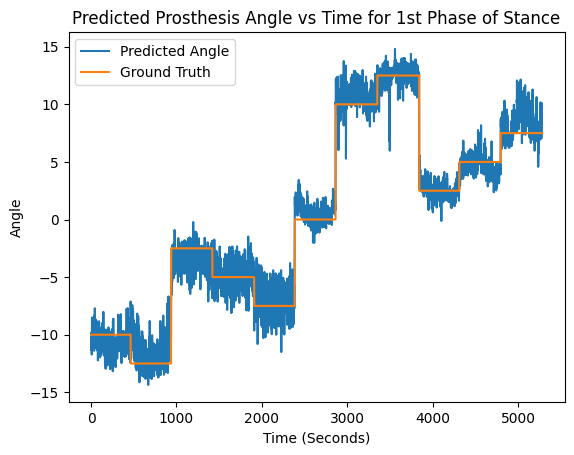

In [20]:
plt.title("Predicted Prosthesis Angle vs Time for 1st Phase of Stance (0-25%)")
plt.xlabel("Time (Seconds)")
plt.ylabel("Angle")
plt.plot(ss.inverse_transform(np.expand_dims(pred, axis=1)), label="Predicted Angle")
plt.plot(ss.inverse_transform(y_test_25), label="Ground Truth")
plt.legend()
plt.show()

In [21]:
xgbMat50Train = xgb.DMatrix(X_train_50, y_train_50)
xgbMat50Val = xgb.DMatrix(X_val_50, y_val_50)
xgbMat50Test = xgb.DMatrix(X_test_50, y_test_50)
xgbMat75Train = xgb.DMatrix(X_train_75, y_train_75)
xgbMat75Val = xgb.DMatrix(X_val_75, y_val_75)
xgbMat75Test = xgb.DMatrix(X_test_75, y_test_75)
xgbMat100Train = xgb.DMatrix(X_train_100, y_train_100)
xgbMat100Val = xgb.DMatrix(X_val_100, y_val_100)
xgbMat100Test = xgb.DMatrix(X_test_100, y_test_100)

In [25]:
evals50 = [(xgbMat50Train, "train"), (xgbMat50Val, "val")]
evals75 = [(xgbMat75Train, "train"), (xgbMat75Val, "val")]
evals100 = [(xgbMat100Train, "train"), (xgbMat100Val, "val")]

model50 = xgb.train(params=params, dtrain=xgbMat50Train, num_boost_round=numIterations, evals=evals50, verbose_eval=10, early_stopping_rounds=50)
model75 = xgb.train(params=params, dtrain=xgbMat75Train, num_boost_round=numIterations, evals=evals75, verbose_eval=10, early_stopping_rounds=50)
model100 = xgb.train(params=params, dtrain=xgbMat100Train, num_boost_round=numIterations, evals=evals100, verbose_eval=10, early_stopping_rounds=50)

[0]	train-rmse:0.71301	val-rmse:0.71244
[10]	train-rmse:0.10732	val-rmse:0.12155
[20]	train-rmse:0.08799	val-rmse:0.10692
[30]	train-rmse:0.07836	val-rmse:0.10164
[40]	train-rmse:0.07105	val-rmse:0.09783
[50]	train-rmse:0.06616	val-rmse:0.09566
[60]	train-rmse:0.06175	val-rmse:0.09411
[70]	train-rmse:0.05806	val-rmse:0.09262
[80]	train-rmse:0.05491	val-rmse:0.09150
[90]	train-rmse:0.05194	val-rmse:0.09093
[100]	train-rmse:0.04927	val-rmse:0.09051
[110]	train-rmse:0.04689	val-rmse:0.09010
[120]	train-rmse:0.04465	val-rmse:0.08986
[130]	train-rmse:0.04265	val-rmse:0.08957
[140]	train-rmse:0.04090	val-rmse:0.08911
[150]	train-rmse:0.03908	val-rmse:0.08891
[160]	train-rmse:0.03758	val-rmse:0.08861
[170]	train-rmse:0.03592	val-rmse:0.08830
[180]	train-rmse:0.03464	val-rmse:0.08818
[190]	train-rmse:0.03335	val-rmse:0.08805
[200]	train-rmse:0.03222	val-rmse:0.08800
[210]	train-rmse:0.03117	val-rmse:0.08791
[220]	train-rmse:0.02995	val-rmse:0.08775
[230]	train-rmse:0.02892	val-rmse:0.08766
[24

In [31]:
pred50 = model50.predict(xgbMat50Test)
pred75 = model75.predict(xgbMat75Test)
pred100 = model100.predict(xgbMat100Test)

print("Mean Squared Error for 0-25%:", mse)
mse50 = mean_squared_error(pred50, y_test_50)
print("Mean Squared Error for 25-50%:", mse50)
mse75 = mean_squared_error(pred75, y_test_75)
print("Mean Squared Error for 50-75%:", mse75)
mse100 = mean_squared_error(pred100, y_test_100)
print("Mean Squared Error for 75-100%:", mse100)

Mean Squared Error for 0-25%: 0.025805454341374007
Mean Squared Error for 25-50%: 0.016186614938733954
Mean Squared Error for 50-75%: 0.025506355979958612
Mean Squared Error for 75-100%: 0.03949679020989115


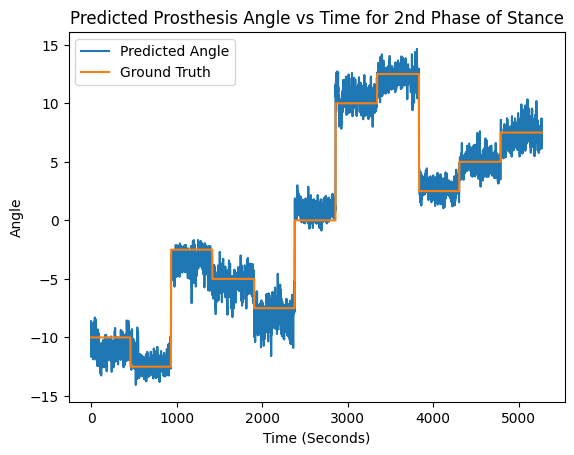

In [28]:
plt.title("Predicted Prosthesis Angle vs Time for 2nd Phase of Stance (25% - 50%)")
plt.xlabel("Time (Seconds)")
plt.ylabel("Angle")
plt.plot(ss.inverse_transform(np.expand_dims(pred50, axis=1)), label="Predicted Angle")
plt.plot(ss.inverse_transform(y_test_50), label="Ground Truth")
plt.legend()
plt.show()

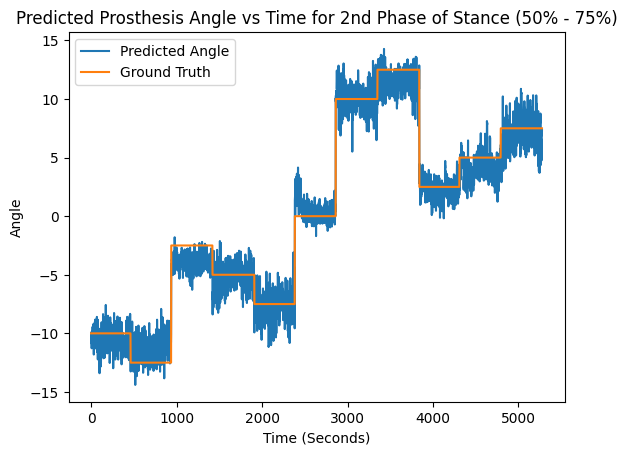

In [29]:
plt.title("Predicted Prosthesis Angle vs Time for 1st Phase of Swing (50% - 75%)")
plt.xlabel("Time (Seconds)")
plt.ylabel("Angle")
plt.plot(ss.inverse_transform(np.expand_dims(pred75, axis=1)), label="Predicted Angle")
plt.plot(ss.inverse_transform(y_test_75), label="Ground Truth")
plt.legend()
plt.show()

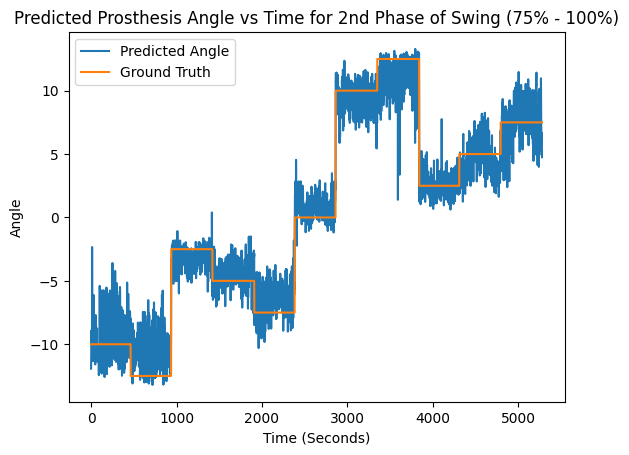

In [30]:
plt.title("Predicted Prosthesis Angle vs Time for 2nd Phase of Swing (75% - 100%)")
plt.xlabel("Time (Seconds)")
plt.ylabel("Angle")
plt.plot(ss.inverse_transform(np.expand_dims(pred100, axis=1)), label="Predicted Angle")
plt.plot(ss.inverse_transform(y_test_100), label="Ground Truth")
plt.legend()
plt.show()

## Conclusions
Based on the MSE Errors of each model on their respective gait phase, for a buffer window of 450ms, it is recommended to estimate slope based on the 2nd Gait Phase (25-50%).